<a href="https://colab.research.google.com/github/Baazigar007/Weather-Data/blob/master/HistoricalWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
!pip install matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import time
!pip install rasterio
import rasterio
import pandas as pd
from PIL import Image
import skimage
%matplotlib inline

     |████████████████████████████████| 18.1MB 59.4MB/s 


In [4]:
from google.colab import files
files.upload()

Saving wc2.1_10m_tmin_01.tif to wc2.1_10m_tmin_01 (1).tif


KeyboardInterrupt: ignored

In [67]:
src1 = rasterio.open("/content/wc2.1_10m_tmin_01.tif")
print (src1.shape)
print (type(src1))
array1=src1.read(1)
print ("array:\n",array1)
print (src1.meta)
b = src1.dataset_mask()
print (b)
print ("Mean:-",np.mean(b/array1))
print ("Median:-",np.mean(b/array1))
print ("Variance:-",np.var(b/array1))
print ("Standard Deviation:-",np.std(b))
print ("QUARTILES")
print ("25% Quantile:-",np.quantile(array1,0.25))
print ("50% Quantile:-",np.quantile(array1,0.50))
print ("75% Quantile:-",np.quantile(array1,0.75))
print ("90% Quantile:-",np.quantile(array1,0.90))
print ("95% Quantile:-",np.quantile(array1,0.95))
print ("99% Quantile:-",np.quantile(array1,0.99))
print ("min Quantile:-",np.quantile(array1,0))
print ("max Quantile:-",np.quantile(array1,1))

(1080, 2160)
<class 'rasterio.io.DatasetReader'>
array:
 [[-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 ...
 [-2.2159750e+01 -2.2905001e+01 -2.2905001e+01 ... -2.4453249e+01
  -2.4439751e+01 -2.2937500e+01]
 [-1.9980499e+01 -2.1058001e+01 -2.1059999e+01 ... -2.2464750e+01
  -2.2458500e+01 -2.0725500e+01]
 [-2.0337999e+01 -2.1010000e+01 -2.1010000e+01 ... -2.2410000e+01
  -2.2410000e+01 -2.1058750e+01]]
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 2160, 'height': 1080, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.16666666666666666, 0.0, -180.0,
       0.0, -0.16666666666666666, 90.0)}
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


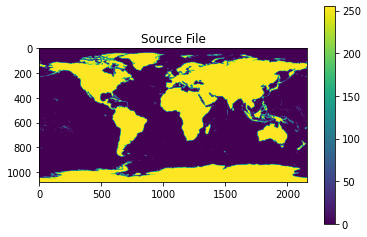

In [21]:
x = plt.imshow(b)
plt.colorbar(x)
plt.title("Source File")
plt.show()

(array([[1009.,    0.,    0., ...,    0.,    0.,   71.],
        [1014.,    0.,    0., ...,    0.,    0.,   66.],
        [1016.,    0.,    0., ...,    0.,    0.,   64.],
        ...,
        [1004.,    0.,    0., ...,    0.,    0.,   76.],
        [1007.,    0.,    0., ...,    0.,    0.,   73.],
        [1006.,    0.,    0., ...,    0.,    0.,   74.]]),
 array([-3.4000000e+38, -3.0600000e+38, -2.7199999e+38, -2.3800000e+38,
        -2.0399999e+38, -1.7000000e+38, -1.3600000e+38, -1.0199999e+38,
        -6.7999998e+37, -3.3999999e+37,  2.7750000e+01], dtype=float32),
 <a list of 2160 Lists of Patches objects>)

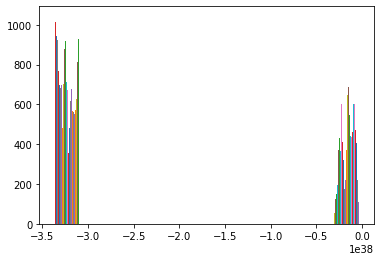

In [5]:
plt.hist(array1)


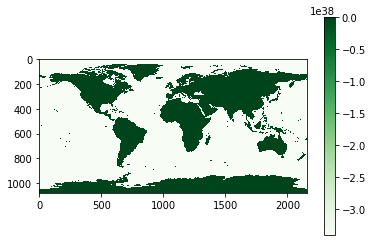

In [8]:
a1=plt.imshow(array1,cmap="Greens",interpolation="none")
plt.colorbar(a1)

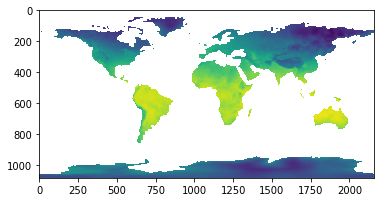

AttributeError: ignored

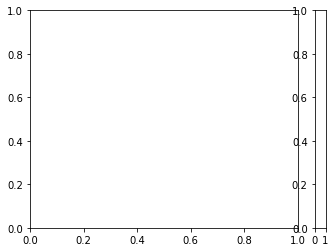

In [9]:
from rasterio.plot import show
a = show(rasterio.open("/content/wc2.1_10m_tmin_01.tif"),with_bounds=False,contour=False,adjust="None")
plt.colorbar(a)

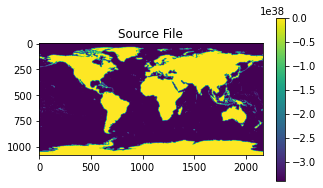

In [10]:
src = rasterio.open("/content/wc2.1_10m_tmin_01.tif")
plt.figure(figsize=(5,3), facecolor='None')
img = plt.imshow(src.read(1))
plt.colorbar(img)
plt.title("Source File")
plt.show()

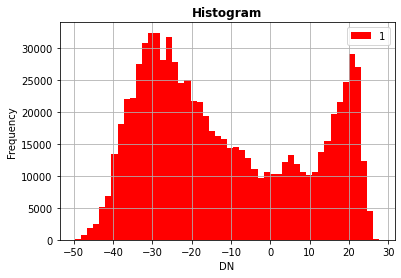

In [18]:
from rasterio.plot import show_hist
show_hist(src,bins=50)

In [83]:
array = src.read(1)
print("Array is:\n",array)
print("Type of array:", type(array))
mean=array.mean()
median = np.median(array)
std = np.std(array)
var = np.var(array)
min = array.min()
max=array.max()
print("Mean of array:", mean)
print("Median of array:", median)
print("Standard Deviation of array:", std)
print("Variance of array:", var)
#print("Quartiles of array:")
#print("First Quartile:",np.quantile(array,0.25),"Second Quartile:",np.quantile(array,0.5),"Third Quartile:",np.quantile(array,0.75))
print("Minimum Value of array:", min)
print("Maximum Value of array:", max)

Array is:
 [[-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 ...
 [-2.2159750e+01 -2.2905001e+01 -2.2905001e+01 ... -2.4453249e+01
  -2.4439751e+01 -2.2937500e+01]
 [-1.9980499e+01 -2.1058001e+01 -2.1059999e+01 ... -2.2464750e+01
  -2.2458500e+01 -2.0725500e+01]
 [-2.0337999e+01 -2.1010000e+01 -2.1010000e+01 ... -2.2410000e+01
  -2.2410000e+01 -2.1058750e+01]]
Type of array: <class 'numpy.ndarray'>
Mean of array: -inf
Median of array: -inf
Standard Deviation of array: inf
Variance of array: inf
Minimum Value of array: -3.4e+38
Maximum Value of array: 27.75


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:183: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


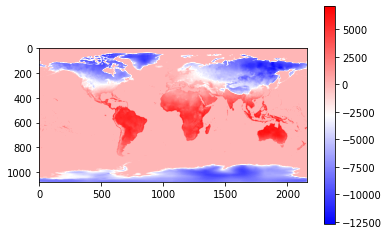

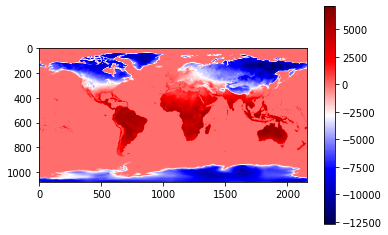

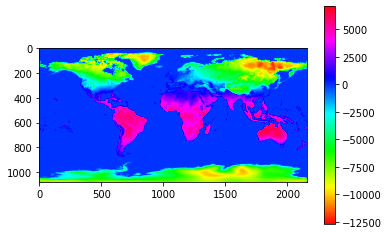

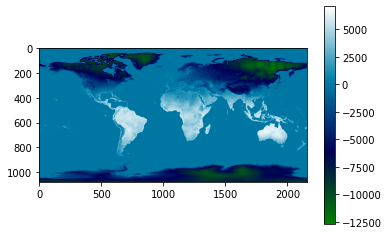

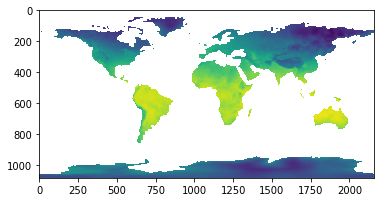

In [81]:
a=['bwr', 'seismic', 'hsv','ocean']
for i in range(len(a)):
    plt.imshow(array1*b,cmap=a[i])
    plt.colorbar()
    plt.show()
from rasterio.plot import show
a = show(rasterio.open("/content/wc2.1_10m_tmin_01.tif"),with_bounds=False,contour=False,adjust="None")


In [28]:
b==array1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

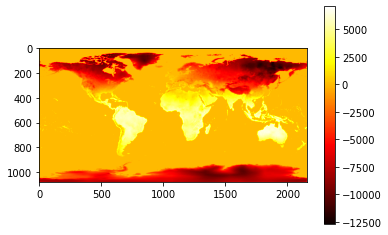

In [53]:
plt.imshow(array1*b,cmap='hot')
plt.colorbar()
plt.show()

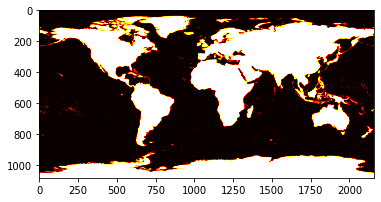

In [58]:
import rasterio
from matplotlib import pyplot
src = rasterio.open("/content/wc2.1_10m_tmin_01.tif")
pyplot.imshow(src.read(1), cmap='hot')
pyplot.show()

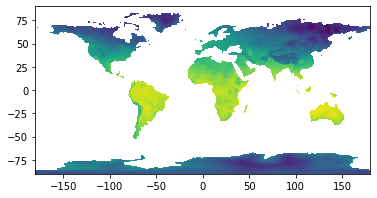

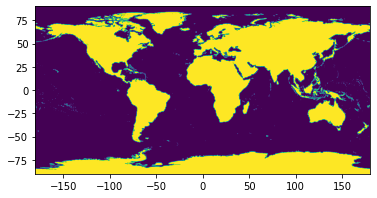

In [63]:
from rasterio.plot import show
show(src)
show(src.read(), transform=src.transform)

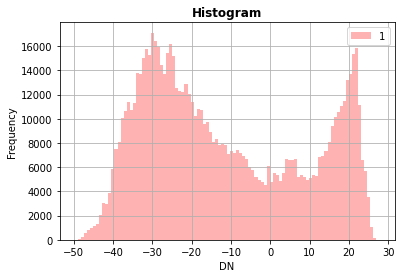

In [65]:
from rasterio.plot import show_hist
show_hist(src, bins=100, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

In [78]:
print (src.nodatavals)
print (src.dtypes)
src.nodata
msk = src.read_masks(1)
msk.shape
msk

(-3.4e+38,)
('float32',)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)